<a href="https://colab.research.google.com/github/UQEKV/Camera_egomotion/blob/master/AiCourseworkP1Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The code uses and saves the data in google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ls

drive/  sample_data/


In [4]:
#cd in the main path

In [5]:
cd /content/drive/MyDrive 

/content/drive/MyDrive


In [6]:
#create directory to save the training and testing data

In [7]:
!mkdir AiData

mkdir: cannot create directory ‘AiData’: File exists


In [8]:
ls

 2002_3000data.mat      histogramUsage.png          testingDummy.png
 2002data.mat           KNN.png                     testingKnn.png
 AiData/               'Kopie von testingKnn.png'   testingKn.png
 AiModel/               modified-SINDy/             testingPolynomial.png
'Colab Notebooks'/      modified-SINDy-1.0.0/       tree
 data/                  MyProject/                  tree0505
 dummy.jpg              nn.model                    tree0505_temp
 faster-rcnn.pytorch/   polynimal.png


In [9]:
cd AiData/

/content/drive/MyDrive/AiData


In [10]:
cd ..

/content/drive/MyDrive


In [11]:
!mkdir AiModel # create the directory to save training model

mkdir: cannot create directory ‘AiModel’: File exists


In [12]:
cd AiModel/

/content/drive/MyDrive/AiModel


In [13]:
!mkdir KnnRegressor #create the directory to save trained models of knn regression

mkdir: cannot create directory ‘KnnRegressor’: File exists


In [14]:
!mkdir LinearRegressor #create the directory to save trained models of linear regression

mkdir: cannot create directory ‘LinearRegressor’: File exists


In [15]:
!mkdir DummyRegressor

mkdir: cannot create directory ‘DummyRegressor’: File exists


In [16]:
cd ..

/content/drive/My Drive


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn.dummy import DummyRegressor
import joblib
import os

In [18]:
regr_model_path = '/content/drive/MyDrive/AiModel/LinearRegressor' # the directory path of saving linear regression models

In [19]:
KnnRegr_model_path = '/content/drive/MyDrive/AiModel/KnnRegressor' # the directory path of saving KNN regression models

In [20]:
DummyRegr_model_path = '/content/drive/MyDrive/AiModel/DummyRegressor'# the directory path of saving Dummy regression models

In [21]:
def make_model_path(base_path, parameter, fold): # create the path of saving linear regression models
  model_name = 'model_' + str(parameter) + '_' + str(fold) + '.pkl' # according to the parameter and the fold number
  path = os.path.join(base_path, model_name)
  return path


In [22]:
make_model_path(regr_model_path, 3, 1) # an example to show the path

'/content/drive/MyDrive/AiModel/LinearRegressor/model_3_1.pkl'

In [23]:
Data = pd.read_csv('/content/drive/MyDrive/AiData/coursework1.csv')#import the data of the coursewokr1 from google drive
print(Data)

            AT      AP      AH    AFDP  ...     TAT     TEY     CDP     NOX
0       4.5878  1018.7  83.675  3.5758  ...  549.83  134.67  11.898  81.952
1       4.2932  1018.3  84.235  3.5709  ...  550.05  134.67  11.892  82.377
2       3.9045  1018.4  84.858  3.5828  ...  550.19  135.10  12.042  83.776
3       3.7436  1018.3  85.434  3.5808  ...  550.17  135.03  11.990  82.505
4       3.7516  1017.8  85.182  3.5781  ...  550.00  134.67  11.910  82.028
...        ...     ...     ...     ...  ...     ...     ...     ...     ...
15034  10.0370  1022.1  88.531  2.9192  ...  549.91  132.61  11.745  76.068
15035   9.8921  1022.2  87.622  2.9415  ...  550.08  133.57  11.869  74.930
15036   9.8723  1022.0  86.618  2.9309  ...  549.99  133.50  11.914  75.041
15037  10.0260  1022.0  87.301  2.9363  ...  550.01  133.20  11.811  74.460
15038  10.0590  1021.8  88.012  2.4579  ...  542.91  111.24  10.585  86.066

[15039 rows x 10 columns]


In [24]:
df = pd.DataFrame(Data) #transfer into dataframe to illustrate the data
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,82.028
...,...,...,...,...,...,...,...,...,...,...
15034,10.0370,1022.1,88.531,2.9192,23.641,1083.6,549.91,132.61,11.745,76.068
15035,9.8921,1022.2,87.622,2.9415,23.859,1084.9,550.08,133.57,11.869,74.930
15036,9.8723,1022.0,86.618,2.9309,23.817,1084.8,549.99,133.50,11.914,75.041
15037,10.0260,1022.0,87.301,2.9363,23.831,1084.5,550.01,133.20,11.811,74.460


In [25]:
data = Data.values # transform the dataframe into numpy array
print(data.shape)
print(data)

(15039, 10)
[[   4.5878 1018.7      83.675  ...  134.67     11.898    81.952 ]
 [   4.2932 1018.3      84.235  ...  134.67     11.892    82.377 ]
 [   3.9045 1018.4      84.858  ...  135.1      12.042    83.776 ]
 ...
 [   9.8723 1022.       86.618  ...  133.5      11.914    75.041 ]
 [  10.026  1022.       87.301  ...  133.2      11.811    74.46  ]
 [  10.059  1021.8      88.012  ...  111.24     10.585    86.066 ]]


In [26]:
X = data[:, 0:9] # get the feature data from the first column to the ninth column of the data
y = data[:, 9].reshape(-1,1) # get the target value from the tenth column of the data and reshape

In [27]:
Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, test_size=0.2, random_state=0) #split the data into testing size 0.2

In [28]:
#Dummy regression
cv = KFold(n_splits=5,random_state=10, shuffle=True) # create an k fold instance with 5 folds and random state 10

mode = np.array(['mean', 'median']) #the parameter of dummy: mean and median
max_mode = 2 # two parameters

trainmse = [[] for _ in range(max_mode)] # create a list for mean squared error of training data
valmse = [[] for _ in range(max_mode)] # create a list for mean squared error of validation data


for m in range(max_mode):
    # Instantiate a dummy regressor (Use the sklearn regressor) with the current value of m(mode)
    dummy_regr = DummyRegressor(mode[m])
    # Loop over the cross-validation splits: 
    i = 1
    for train_index, val_index in cv.split(Xtr):
        Xtrain, Xval, Ytrain, Yval = Xtr[train_index], Xtr[val_index], Ytr[train_index], Ytr[val_index]
        # fit the model on the current split of data 
        dummy_regr.fit(Xtrain, Ytrain)
        path = make_model_path(DummyRegr_model_path, m+1, i) #create path for saving model
        joblib.dump(filename=path, value = dummy_regr) #save model
        # make predictions 
        pred_tr = dummy_regr.predict(Xtrain)
        pred_v = dummy_regr.predict(Xval)
        # calculate training and validation MSE and store 
        trainmse[m].append(mean_squared_error(Ytrain, pred_tr))
        valmse[m].append(mean_squared_error(Yval, pred_v))
        i = i+1
# Calculate the mean training and validation MSE for each mode
mean_train_mse = np.mean(trainmse, axis=1)
mean_val_mse = np.mean(valmse, axis=1)

In [29]:
print(mean_train_mse)
print(mean_val_mse)

[110.64037878 113.24318006]
[110.65874131 113.25304692]


optimal parameter =  mean


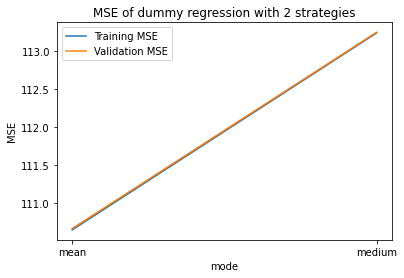

In [30]:
x = range(1, max_mode+1)#plot data for mean and medium
plt.plot(['mean', 'medium'], mean_train_mse, label='Training MSE')
plt.plot(['mean', 'medium'], mean_val_mse, label='Validation MSE')
plt.legend()
plt.xlabel('mode')
plt.title('MSE of dummy regression with 2 strategies')
plt.ylabel('MSE')
plt.savefig('dummy.jpg')
print('optimal parameter = ', mode[np.where(mean_val_mse == mean_val_mse.min())[0][0]]) # find the optimal parameter

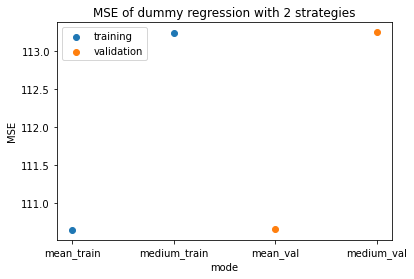

In [31]:
dummy_train = ['mean_train', 'medium_train']
dummy_val = ['mean_val', 'medium_val']
fig, ax = plt.subplots() # This generates us a named figure and axes
ax.scatter(dummy_train, mean_train_mse, label = 'training')
ax.scatter(dummy_val, mean_val_mse, label = 'validation')
plt.legend()
plt.title('MSE of dummy regression with 2 strategies')
plt.xlabel('mode')
plt.ylabel('MSE')# Both have similar bad results
plt.savefig('dummy.jpg')

MSE: 105.56133020422938
[68.15163792 68.15163792 68.15163792 ... 68.15163792 68.15163792
 68.15163792]


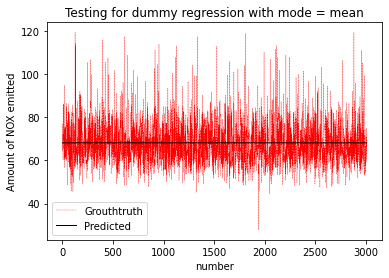

In [32]:
#testing for dummy regression
DummyRegr_opt_model = joblib.load('/content/drive/MyDrive/AiModel/DummyRegressor/model_1_4.pkl')#upload the model
DummyResult_test = DummyRegr_opt_model.predict(Xtest) #prediction
plt.plot(range(1, DummyResult_test.size+1), Ytest, label='Grouthtruth', color='r',linestyle='--',linewidth=0.3)
plt.plot(range(1, DummyResult_test.size+1), DummyResult_test, label='Predicted', color='k',linewidth=1)#plot data
plt.legend()
plt.xlabel('number')
plt.ylabel('Amount of NOX emitted')
plt.title('Testing for dummy regression with mode = mean')
print('MSE:',mean_squared_error(DummyResult_test, Ytest))
plt.savefig('testingDummy.png') #SAVE
print(DummyResult_test)

In [33]:
#polynomial regression with k degree
cv = KFold(n_splits=5,random_state=10, shuffle=True) # create an k fold instance with 5 folds and random state 10


max_deg = 5 # maximal degree of polynom is 5

trainmse = [[] for _ in range(max_deg)]
valmse = [[] for _ in range(max_deg)]

for k in range(max_deg):
    
    # Instantiate a linear regressior (Use the sklearn regressor) with the current value of k(degree of polynom) 
    regr = linear_model.LinearRegression()
    poly=PolynomialFeatures(degree=k+1)#create an instance of polynom
    i = 1 # numerate for creating model path in each degree
    # Loop over the cross-validation splits: 
    for train_index, val_index in cv.split(Xtr):
        Xtrain, Xval, Ytrain, Yval = Xtr[train_index], Xtr[val_index], Ytr[train_index], Ytr[val_index]
        Xtrain_new = poly.fit_transform(Xtrain) #transfrom data into k degree
        Xval_new = poly.fit_transform(Xval)
        # fit the model on the current split of data 
        regr.fit(Xtrain_new, Ytrain)
        path = make_model_path(regr_model_path, k+1, i) #create path for saving model
        joblib.dump(filename=path, value = regr) #save model
        # make predictions 
        pred_tr = regr.predict(Xtrain_new)
        pred_v = regr.predict(Xval_new)
        # calculate training and validation MSE and store 
        trainmse[k].append(mean_squared_error(Ytrain, pred_tr))
        valmse[k].append(mean_squared_error(Yval, pred_v))
        i = i + 1
# Calculate the mean training and validation MSE for each k
mean_train_mse = np.mean(trainmse, axis=1)
mean_val_mse = np.mean(valmse, axis=1)

In [34]:
print(mean_train_mse)
print(mean_val_mse)

[49.78646321 19.99762826 14.40856053 10.99832753  8.78750908]
[49.94936401 20.66896203 16.40432994 31.93293391 71.67154767]


optimal parameter =  3


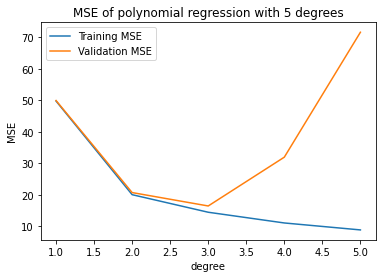

In [35]:
 x = range(1, max_deg+1)#plot data
plt.plot(x, mean_train_mse, label='Training MSE')
plt.plot(x, mean_val_mse, label='Validation MSE')
plt.legend()
plt.xlabel('degree')
plt.ylabel('MSE')#when k = 3, we can get the best model
plt.title('MSE of polynomial regression with 5 degrees')
plt.savefig('polynimal.png')
print('optimal parameter = ', np.where(mean_val_mse == mean_val_mse.min())[0][0] + 1)#find the optimal parameter

In [36]:
regr_opt_model = joblib.load('/content/drive/MyDrive/AiModel/LinearRegressor/model_3_4.pkl')#upload the model

In [37]:
#testing for polynomial regression
poly=PolynomialFeatures(degree=3)#create a polynom instance with 3 degree
Xtest_new = poly.fit_transform(Xtest)#transform data into 3 degree which is the best parameter
result_test = regr_opt_model.predict(Xtest_new) #prediction

MSE: 15.951830431384833


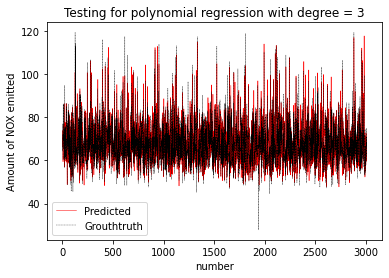

In [38]:
plt.plot(range(1, result_test.size+1), result_test, label='Predicted',color='r',linewidth=0.5)#plot data when degree is 3
plt.plot(range(1, result_test.size+1), Ytest, label='Grouthtruth', color='k',linestyle='--',linewidth=0.3)
plt.legend()
plt.xlabel('number')
plt.ylabel('Amount of NOX emitted')
plt.title('Testing for polynomial regression with degree = 3')
print('MSE:',mean_squared_error(result_test, Ytest))
plt.savefig('testingPolynomial')#save figure

In [39]:
#KNN regression
cv = KFold(n_splits=5,random_state=10, shuffle=True)# create an k fold instance with 5 folds and random state 10
max_k = 35 #maximal k is 35
trainmse = [[] for _ in range(max_k)]
valmse = [[] for _ in range(max_k)]
for k in range(max_k):
    
    # Instantiate a k-nn regressor (Use the sklearn regressor) with the current value of k 
    knn_regr = KNeighborsRegressor(n_neighbors=k+1)
    # Loop over the cross-validation splits: 
    i = 1
    for train_index, val_index in cv.split(Xtr):
        Xtrain, Xval, Ytrain, Yval = Xtr[train_index], Xtr[val_index], Ytr[train_index], Ytr[val_index]
        # fit the model on the current split of data 
        knn_regr.fit(Xtrain, Ytrain)
        path = make_model_path(KnnRegr_model_path, k+1, i) #create path for saving model
        joblib.dump(filename=path, value = knn_regr) #save model
        # make predictions 
        pred_tr = knn_regr.predict(Xtrain)
        pred_v = knn_regr.predict(Xval)
        # calculate training and validation MSE and store 
        trainmse[k].append(mean_squared_error(Ytrain, pred_tr))
        valmse[k].append(mean_squared_error(Yval, pred_v))
        i = i+1
# Calculate the mean training and validation MSE for each k
mean_train_mse = np.mean(trainmse, axis=1)
mean_val_mse = np.mean(valmse, axis=1)

In [40]:
print(mean_train_mse)
print(mean_val_mse)

[ 0.          5.9430247   8.50532231 10.07119562 11.17501604 12.01674225
 12.73314115 13.37561606 13.92245589 14.41711868 14.85999425 15.21671806
 15.53042323 15.85716152 16.10958209 16.37624159 16.63398607 16.84762551
 17.07312188 17.30519863 17.51059484 17.71570946 17.88848559 18.0403598
 18.19170601 18.35687373 18.50754117 18.65357166 18.80890539 18.95263476
 19.09972916 19.23054017 19.35944074 19.49373483 19.62854821]
[24.57607119 20.0332104  18.28573915 17.91050418 17.63693744 17.66251223
 17.7547167  17.99021641 18.10664442 18.24392503 18.30812654 18.48379483
 18.61931836 18.77627512 18.81306571 18.97212652 19.11841718 19.25640332
 19.40089382 19.50502909 19.60225926 19.66837009 19.78003272 19.86713743
 19.95288106 20.07175859 20.20561584 20.30080326 20.39632868 20.52048065
 20.65408407 20.76956777 20.87593722 20.99517235 21.04940995]


optimal parameter =  5


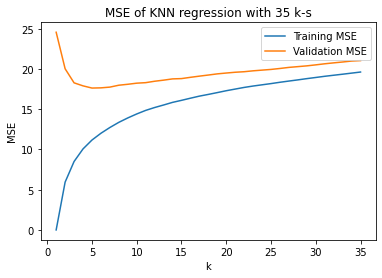

In [41]:
x = range(1, max_k+1)#plot data for every k
plt.plot(x, mean_train_mse, label='Training MSE')
plt.plot(x, mean_val_mse, label='Validation MSE')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('MSE of KNN regression with 35 k-s')
plt.savefig('KNN.png') #save figure
print('optimal parameter = ', np.where(mean_val_mse == mean_val_mse.min())[0][0] + 1) # find the optimal parameter

MSE: 18.518506982034577


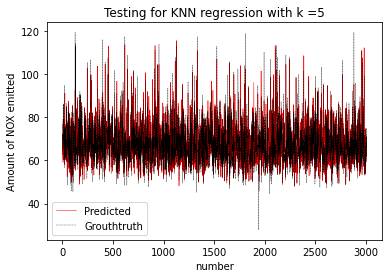

In [42]:
#testing for KNN regression
KnnRegr_opt_model = joblib.load('/content/drive/MyDrive/AiModel/KnnRegressor/model_5_3.pkl')#upload the model
KnnResult_test = KnnRegr_opt_model.predict(Xtest) #prediction
plt.plot(range(1, KnnResult_test.size+1), KnnResult_test, label='Predicted',color='r',linewidth=0.5)#plot data
plt.plot(range(1, KnnResult_test.size+1), Ytest, label='Grouthtruth', color='k',linestyle='--',linewidth=0.3)
plt.legend()
plt.xlabel('number')
plt.ylabel('Amount of NOX emitted')
plt.title('Testing for KNN regression with k =5')
print('MSE:',mean_squared_error(KnnResult_test, Ytest))
plt.savefig('testingKnn.png')#save figure

In [43]:
# polynimial regression without cross validation
Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, test_size=0.2, random_state=10)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtr, Ytr, test_size=0.2, random_state=0)
regr = linear_model.LinearRegression()
mse_tr = []
mse_val = []
max_deg = 5
for i in range(max_deg): #for each degree
    poly=PolynomialFeatures(degree=i+1) #initialise the polynomial feature
    Xtrain_new = poly.fit_transform(Xtrain) #k degree transformation
    Xval_new = poly.fit_transform(Xval)
    regr.fit(Xtrain_new, Ytrain) #fit model
    pred_tr = regr.predict(Xtrain_new) #prediction
    pred_v = regr.predict(Xval_new)
    mse_tr.append(mean_squared_error(pred_tr, Ytrain)) #mean calculation
    mse_val.append(mean_squared_error(pred_v, Yval))
    

Text(0, 0.5, 'MSE')

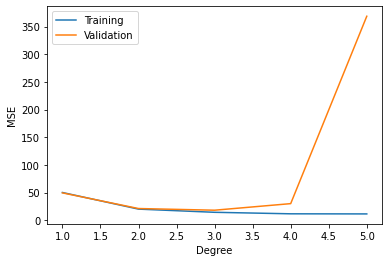

In [44]:
plt.plot(range(1, max_deg+1), mse_tr, label='Training')#plot data for every degree
plt.plot(range(1, max_deg+1), mse_val, label='Validation')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('MSE')


In [45]:
print('Validation:', mse_val)
print('Training:', mse_tr)

Validation: [49.371949904802044, 21.097799975527305, 18.071378859601285, 29.951096821042913, 368.53672508929094]
Training: [50.0775900938459, 20.03619478212713, 14.294124117097416, 11.558305486697304, 11.365060639909862]
